In [22]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Manipulation

In [6]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

## Visualization

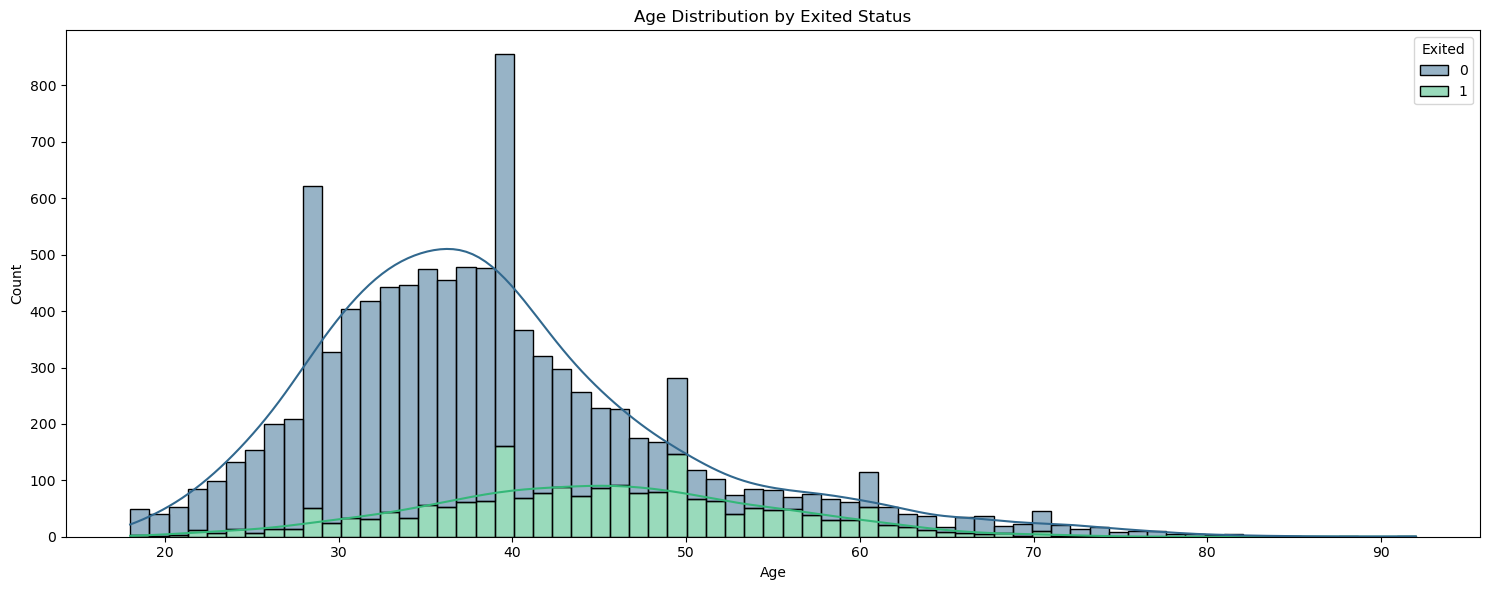

In [7]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df, x='Age', hue = 'Exited', multiple = 'stack', kde=True, palette = 'viridis')
plt.title('Age Distribution by Exited Status')
plt.tight_layout()
plt.show()

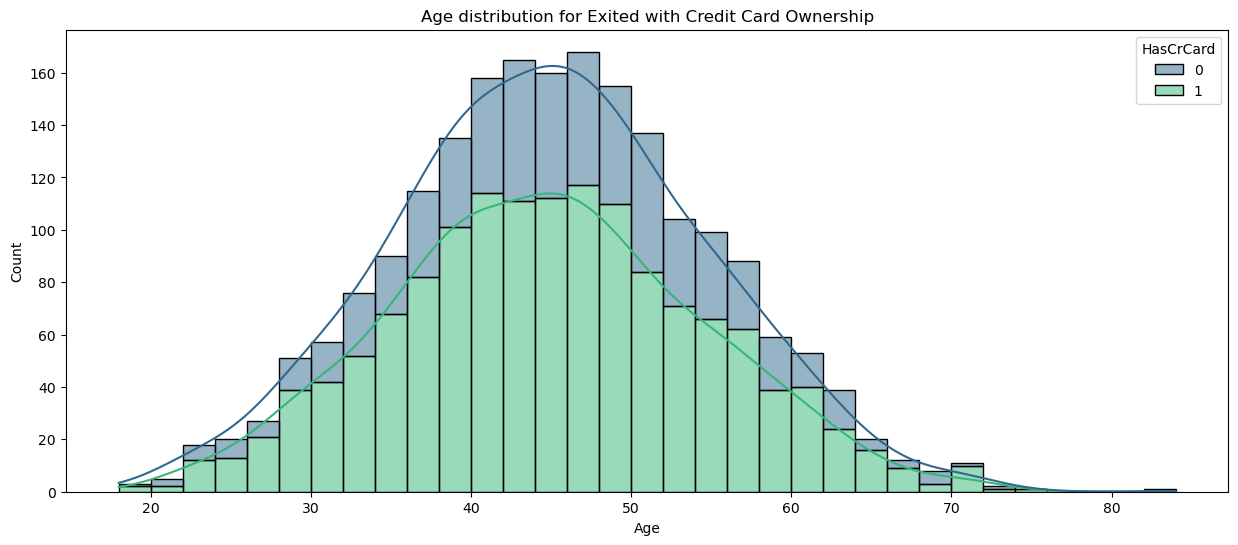

In [8]:
plt.figure(figsize = (15, 6))

df_exited = df[df['Exited'] == 1]
sns.histplot(data=df_exited, x='Age', hue='HasCrCard', multiple='stack', kde=True, palette='viridis')
plt.title('Age distribution for Exited with Credit Card Ownership')
plt.xlabel('Age')
plt.show()

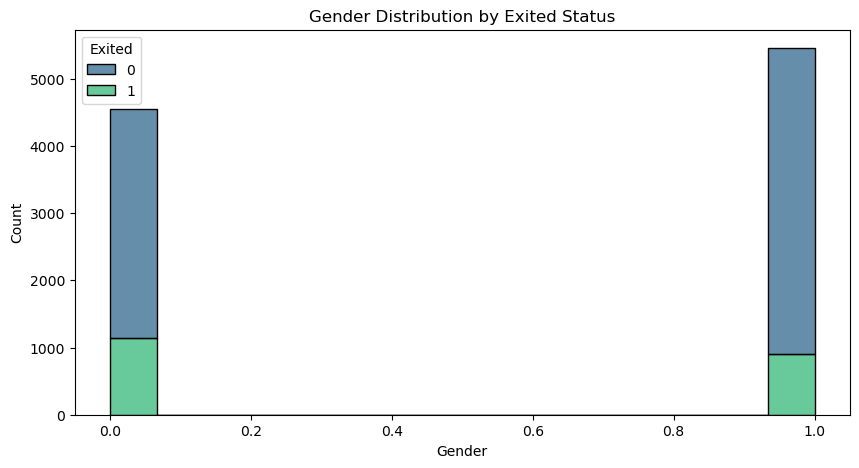

In [9]:
plt.figure(figsize = (10, 5))

sns.histplot(data=df, x='Gender', hue='Exited', multiple='stack', palette='viridis')
plt.title('Gender Distribution by Exited Status')

plt.show()

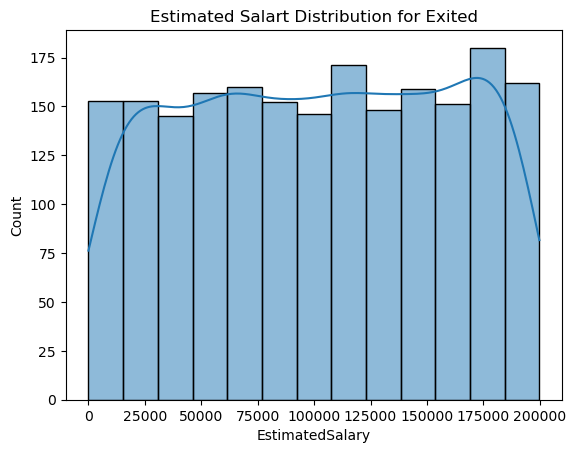

In [10]:
sns.histplot(data = df.loc[df['Exited'] == 1], x = 'EstimatedSalary', kde = True)
plt.title('Estimated Salart Distribution for Exited')
plt.show()

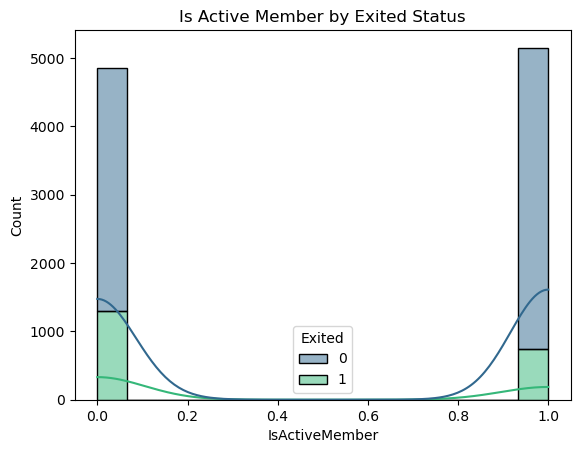

In [11]:
sns.histplot(data = df, x = 'IsActiveMember', hue = 'Exited', multiple = 'stack', kde = True, palette = 'viridis')
plt.title('Is Active Member by Exited Status')

plt.show()

In [12]:
churn_count = df[df['Exited'] == 1].groupby('Geography').size().reset_index(name='churn_count')

# Calculate non-churn count
non_churn_count = df[df['Exited'] == 0].groupby('Geography').size().reset_index(name='no_churn_count')

# Merge churn and non-churn counts
combined_count = churn_count.merge(non_churn_count, on='Geography')

# Calculate total count
total_count = df['Geography'].value_counts().reset_index(name='total_count')

# Merge total count with combined counts
combined_count = combined_count.merge(total_count, on='Geography')

# Calculate churn percentage
combined_count['churn_percentage'] = (combined_count['churn_count'] / combined_count['total_count']).round(4) * 100

# Display the resulting DataFrame
print(combined_count)

  Geography  churn_count  no_churn_count  total_count  churn_percentage
0    France          810            4204         5014             16.15
1   Germany          814            1695         2509             32.44
2     Spain          413            2064         2477             16.67


In [13]:
df['Geography'] = df['Geography'].map({'France': 1, 'Germany': 2, 'Splain': 3})

In [14]:
df.drop(['CustomerId', 'Surname'], axis = 1, inplace = True)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Exited', axis = 1), df['Exited'], test_size = 0.3)

In [16]:
x_train.isnull().sum()

RowNumber             0
CreditScore           0
Geography          1744
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
dtype: int64

In [17]:
x_test.isnull()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
125,False,False,False,False,False,False,False,False,False,False,False
6786,False,False,False,False,False,False,False,False,False,False,False
8501,False,False,True,False,False,False,False,False,False,False,False
5728,False,False,False,False,False,False,False,False,False,False,False
8662,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1481,False,False,True,False,False,False,False,False,False,False,False
2650,False,False,False,False,False,False,False,False,False,False,False
6237,False,False,False,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False,False,False,False


In [23]:
# Dealing with missing data

imputer = SimpleImputer(strategy='mean') 
x_train = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

## Logistic Regrssion 

In [24]:
parameters = {
    'max_iter': [100, 200, 500]
}

lr_classifier = LogisticRegression()

# Fit the model to the training data
lr_classifier.fit(x_train, y_train)
y_pred_lr = lr_classifier.predict(x_test_imputed)

In [25]:
lr_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_lr)

In [26]:
print('The accuract score of the model is:', lr_accuracy)

The accuract score of the model is: 0.785
